# What is web scraping?
---------------------------------------------------------------------------------------------------------------------------
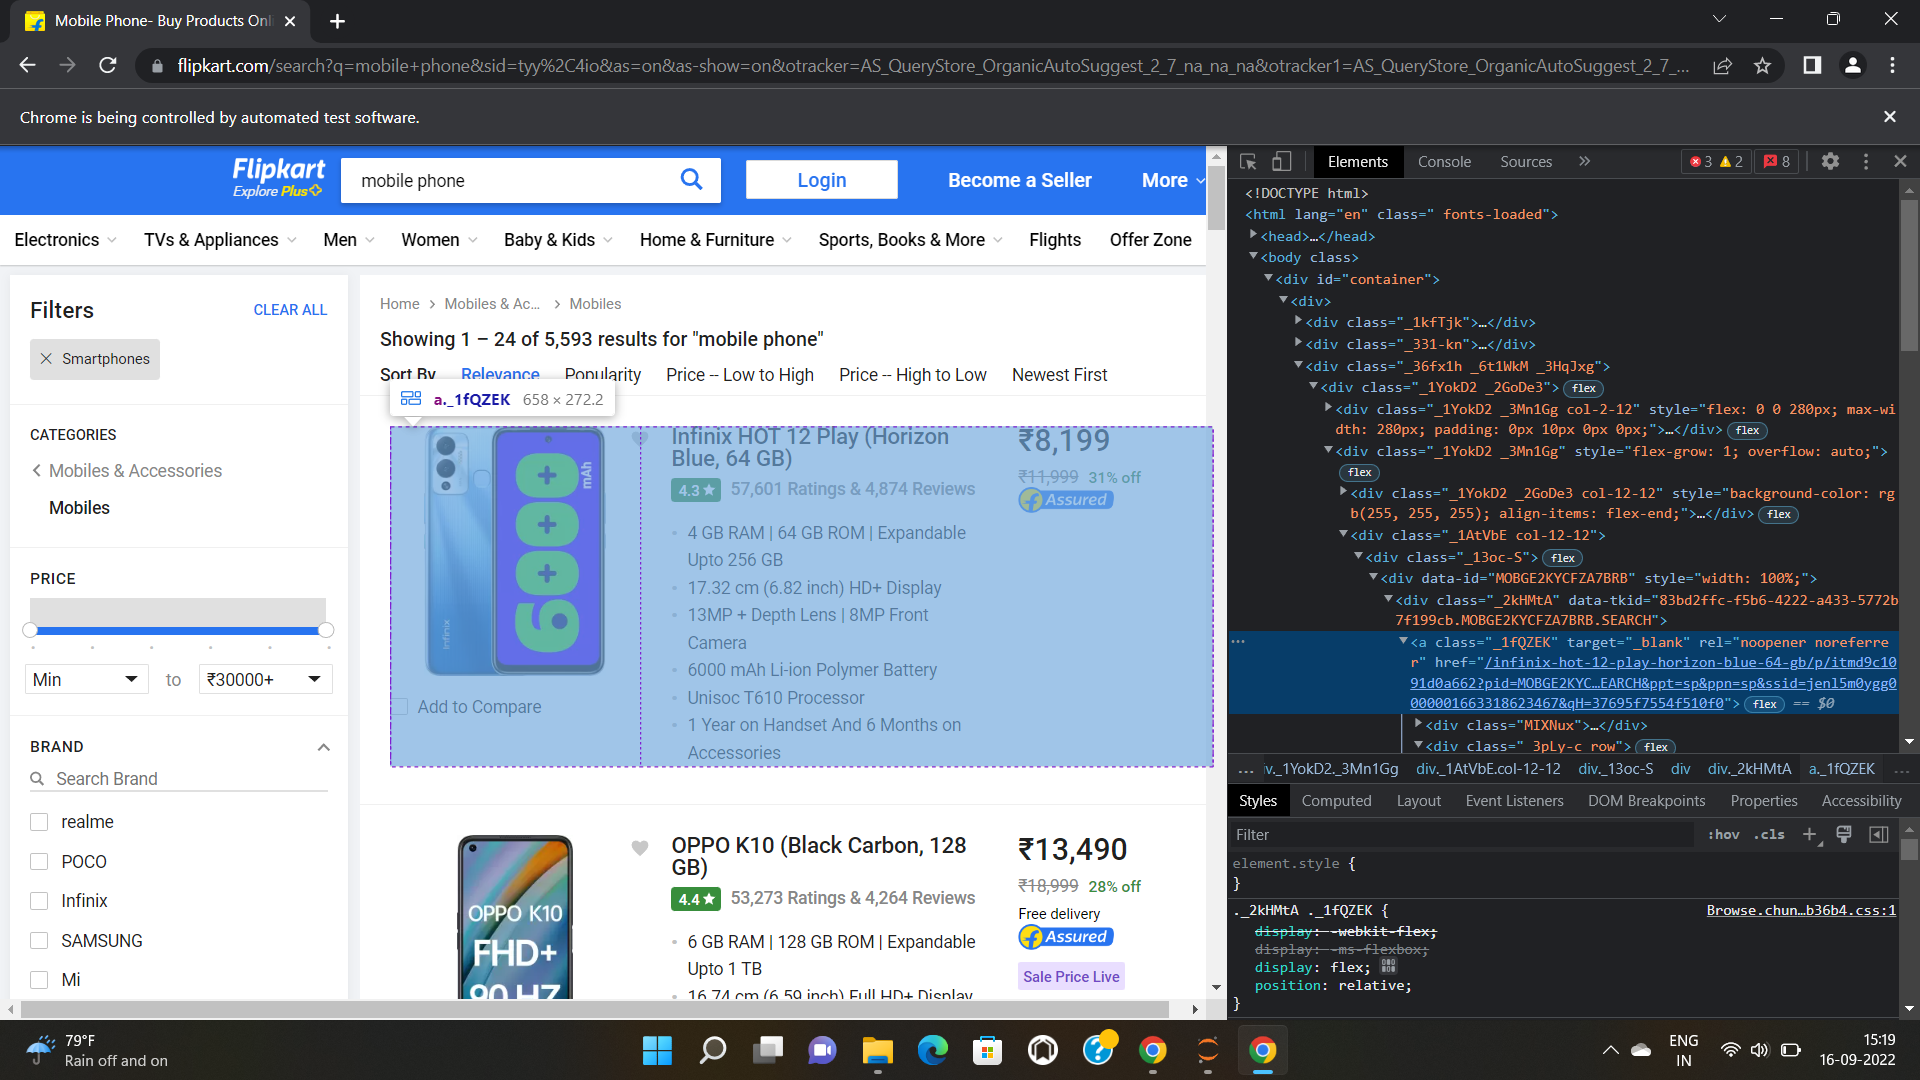

- Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. Web scraping software may directly access the World Wide Web using the Hypertext Transfer Protocol or a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis.

## Library used for Web Scraping

   - **Pandas:** Pandas is a library used for data manipulation and analysis. It is used to store the data in the desired format.
   - **BeautifulSoup:** BeautifulSoup is the python web scraping library used for parsing HTML documents. It creates parse trees that are helpful in extracting tags from the HTML string.
   - **Selenium:** Selenium is a tool designed to help you run automated tests in web applications. Although it's not its main purpose, Selenium is also used in Python for web scraping, because it can access JavaScript-rendered content (which regular scraping tools like BeautifulSoup can't do). We'll use Selenium to download the HTML content from Flipkart and see in an interactive way what's happening.

## 1.Scraping agenda

- Today we are going to scrap the smartphone data from the e-commerce site www.flipkart.com 
- Steps are following as-
    - Import necessary libraries.
    - Find th URL that we want to scrap.
    - Inspect the tags and html.
    - The data we want to extract.
    - Store the data into csv file.

In [1]:
# Imorting libraries
import csv
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd

In [2]:
# Creating an instance of webdriver for google chrome
driver = webdriver.Chrome()

In [3]:
# Using webdriver we'll now open the flipkart website in chrome
url =  'https://flipkart.com'
# We;ll use the get method of driver and pass in the URL
driver.get(url)

In [4]:
#This function fetches the URL of the item that you want to search

def get_url(search_item):
    template = 'https://www.flipkart.com/search?q=mobile+phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.type%255B%255D%3DSmartphones'
    # We'are replacing every space with '+' to adhere with the pattern 
    search_item = search_item.replace(" ","+")
    return template.format(search_item)

In [5]:
# Checking whether the function is working properly or not
url = get_url('mobile phones')
print(url)

https://www.flipkart.com/search?q=mobile+phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.type%255B%255D%3DSmartphones


### 1.1 Inspecting tags and html

In [6]:
# Creating a soup object using driver.page_source to retreive the HTML text and then we'll use the default html parser to parse
# the HTML.
soup = BeautifulSoup(driver.page_source, 'html.parser')


In [7]:
results = soup.find_all('a',{'class':"_1fQZEK"})
len(results)

24

In [8]:
# picking the 1st card from the complete list of cards
item = results[0]

### 1.2 Extracting data for single model

In [9]:
# Extracting the model of the phone from the 1st card
model = item.find('div',{'class':"_4rR01T"}).text
model

'Infinix HOT 12 Play (Horizon Blue, 64 GB)'

In [10]:
# Extracting Stars from 1st card
star = item.find('div',{'class':"_3LWZlK"}).text
star

'4.3'

In [11]:
# Extracting Number of Ratings from 1st card
num_ratings = item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[0:item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')].strip()
num_ratings

'58,542 Ratings'

In [12]:
# Extracting Number of Reviews from 1st card
reviews = item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')+1:].strip()
reviews

'4,922 Reviews'

In [13]:
# Extracting RAM from the 1st card
ram = item.find('li',{'class':"rgWa7D"}).text[0:item.find('li',{'class':"rgWa7D"}).text.find('|')]
ram

'4 GB RAM '

In [14]:
# Extracting Storage/ROM from 1st card
storage = item.find('li',{'class':"rgWa7D"}).text[item.find('li',{'class':"rgWa7D"}).text.find('|')+1:][0:10].strip()
storage

'64 GB ROM'

In [15]:
# Extracting whether there is an option of expanding the storage or not
expandable = item.find('li',{'class':"rgWa7D"}).text[item.find('li',{'class':"rgWa7D"}).text.find('|')+1:][13:]
expandable

'Expandable Upto 256 GB'

In [16]:
# Extracting the display option from the 1st card
display = item.find_all('li')[1].text.strip()
display

'17.32 cm (6.82 inch) HD+ Display'

In [17]:
# Extracting camera options from the 1st card
camera = item.find_all('li')[2].text.strip()
camera

'13MP + Depth Lens | 8MP Front Camera'

In [18]:
# Extracting the battery option from the 1st card
battery = item.find_all('li')[3].text
battery

'6000 mAh Li-ion Polymer Battery'

In [19]:
# Extracting the processir option from the 1st card
processor = item.find_all('li')[4].text.strip()
processor

'Unisoc T610 Processor'

In [20]:
# Extracting Warranty from the 1st card
warranty = item.find_all('li')[-1].text.strip()
warranty

'1 Year on Handset And 6 Months on Accessories'

In [21]:
# Extracting price of the model from the 1st card
price = item.find('div',{'class':'_30jeq3 _1_WHN1'}).text
price

'₹8,199'

### 1.3 Extracting data from first page

In [22]:
# This function extracts model, price, ram, storage, stars , number of ratings, number of reviews, storage expandable option, display option, camera quality, battery , processor, warranty of a phone model at flipkart

def extract_phone_model_info(item):
    model = item.find('div',{'class':"_4rR01T"}).text
    star = item.find('div',{'class':"_3LWZlK"}).text
    num_ratings = item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[0:item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')].strip()
    reviews = item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')+1:].strip()
    ram = item.find('li',{'class':"rgWa7D"}).text[0:item.find('li',{'class':"rgWa7D"}).text.find('|')]
    storage = item.find('li',{'class':"rgWa7D"}).text[item.find('li',{'class':"rgWa7D"}).text.find('|')+1:][0:10].strip()
    expandable = item.find('li',{'class':"rgWa7D"}).text[item.find('li',{'class':"rgWa7D"}).text.find('|')+1:][13:]
    display = item.find_all('li')[1].text.strip()
    camera = item.find_all('li')[2].text.strip()
    battery = item.find_all('li')[3].text
    processor = item.find_all('li')[4].text.strip()
    warranty = item.find_all('li')[-1].text.strip()
    price = item.find('div',{'class':'_30jeq3 _1_WHN1'}).text
    result = (model,star,num_ratings,reviews,ram,storage,expandable,display,camera,battery,processor,warranty,price)
    return result

In [23]:
# Now putting all the information from all the cards/phone models and putting them into a list
records_list = []
results = soup.find_all('a',{'class':"_1fQZEK"})
for item in results:
    records_list.append(extract_phone_model_info(item))

In [24]:
pd.DataFrame(records_list,columns=['model',"star","num_ratings"
   ,"reviews",'ram',"storage","expandable","display","camera","battery","processor","warranty","price"])

,model,star,num_ratings,reviews,ram,storage,expandable,display,camera,battery,processor,warranty,price
0,"Infinix HOT 12 Play (Horizon Blue, 64 GB)",4.3,"58,542 Ratings","4,922 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 256 GB,17.32 cm (6.82 inch) HD+ Display,13MP + Depth Lens | 8MP Front Camera,6000 mAh Li-ion Polymer Battery,Unisoc T610 Processor,1 Year on Handset And 6 Months on Accessories,"₹8,199"
1,"Infinix HOT 12 Play (Racing Black, 64 GB)",4.3,"58,542 Ratings","4,922 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 256 GB,17.32 cm (6.82 inch) HD+ Display,13MP + Depth Lens | 8MP Front Camera,6000 mAh Li-ion Polymer Battery,Unisoc T610 Processor,1 Year on Handset And 6 Months on Accessories,"₹8,199"
2,"Infinix HOT 12 Play (Champagne Gold, 64 GB)",4.3,"58,542 Ratings","4,922 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 256 GB,17.32 cm (6.82 inch) HD+ Display,13MP + Depth Lens | 8MP Front Camera,6000 mAh Li-ion Polymer Battery,Unisoc T610 Processor,1 Year on Handset And 6 Months on Accessories,"₹8,199"
3,"Infinix HOT 12 Play (Daylight Green, 64 GB)",4.3,"58,542 Ratings","4,922 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 256 GB,17.32 cm (6.82 inch) HD+ Display,13MP + Depth Lens | 8MP Front Camera,6000 mAh Li-ion Polymer Battery,Unisoc T610 Processor,1 Year on Handset And 6 Months on Accessories,"₹8,199"
4,"OPPO K10 (Black Carbon, 128 GB)",4.4,"53,747 Ratings","4,290 Reviews",6 GB RAM,128 GB RO,Expandable Upto 1 TB,16.74 cm (6.59 inch) Full HD+ Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹13,490"
5,"OPPO K10 (Blue Flame, 128 GB)",4.4,"53,747 Ratings","4,290 Reviews",6 GB RAM,128 GB RO,Expandable Upto 1 TB,16.74 cm (6.59 inch) Full HD+ Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹13,490"
6,"REDMI 9i Sport (Coral Green, 64 GB)",4.4,"1,41,792 Ratings","8,154 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,MediaTek Helio G25 Processor,Brand Warranty of 1 Year Available for Mobile ...,"₹7,999"
7,"Infinix Smart 6 HD (Aqua Sky, 32 GB)",4.6,480 Ratings,17 Reviews,2 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.76 cm (6.6 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Lithium-ion Polymer Battery,Mediatek Helio A22 Processor,1 Year on Handset and 6 Months on Accessories,"₹6,199"
8,"realme C33 (Sandy Gold, 32 GB)",4.6,142 Ratings,3 Reviews,3 GB RAM,32 GB ROM,Expandable Upto 1 TB,16.51 cm (6.5 inch) HD+ Display,50MP + 0.3MP | 5MP Front Camera,5000 mAh Lithium Ion Battery,Unisoc T612 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹8,999"
9,"realme C33 (Aqua Blue, 32 GB)",4.6,142 Ratings,3 Reviews,3 GB RAM,32 GB ROM,Expandable Upto 1 TB,16.51 cm (6.5 inch) HD+ Display,50MP + 0.3MP | 5MP Front Camera,5000 mAh Lithium Ion Battery,Unisoc T612 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹8,999"


## 2. Extracting data from multiple pages

In [25]:
#This function fetches the URL of the item that you want to search

def get_url(search_item):
    template ='https://www.flipkart.com/search?q=mobile+phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.type%255B%255D%3DSmartphones'
    search_item = search_item.replace(" ","+")
    # Add term query to URL
    url = template.format(search_item)
    # Add term query placeholder
    url += '&page={}'
    return url

In [26]:
# Importing necessary Libraries
import csv
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd

In [27]:
#This function fetches the URL of the item that you want to search

def get_url(search_item):
    template = 'https://www.flipkart.com/search?q=mobile+phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.type%255B%255D%3DSmartphones'
    search_item = search_item.replace(" ","+")
    # Add term query to URL
    url = template.format(search_item)
    # Add term query placeholder
    url += '&page={}'
    return url

In [57]:
"""
This function extracts model, price, ram, storage, stars , number of ratings, number of reviews, 
storage expandable option, display option, camera quality, battery , processor, warranty of a phone model at flipkart
"""

def extract_phone_model_info(item):
    model = item.find('div',{'class':"_4rR01T"}).text
    try:
        star = item.find('div',{'class':"_3LWZlK"}).text
    except:
        star = 'None'
    try:
        num_ratings = item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[0:item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')].strip()
    except:
        num_ratings = 'None'
    try:
        reviews = item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')+1:].strip()
    except:
        reviews = 'None'
    ram = item.find('li',{'class':"rgWa7D"}).text[0:item.find('li',{'class':"rgWa7D"}).text.find('|')]
    storage = item.find('li',{'class':"rgWa7D"}).text[item.find('li',{'class':"rgWa7D"}).text.find('|')+1:][0:10].strip()
    expandable = item.find('li',{'class':"rgWa7D"}).text[item.find('li',{'class':"rgWa7D"}).text.find('|')+1:][13:]
    display = item.find_all('li')[1].text.strip()
    camera = item.find_all('li')[2].text.strip()
    battery = item.find_all('li')[3].text
    processor = item.find_all('li')[4].text.strip()
    warranty = item.find_all('li')[-1].text.strip()
    price = item.find('div',{'class':'_30jeq3 _1_WHN1'}).text
    result = (model,star,num_ratings,reviews,ram,storage,expandable,display,camera,battery,processor,warranty,price)
    return result

### 2.2 Create a dataframe for mutliple pages

In [58]:
#This function will create a dataframe for all the details that we are fetching from all the multiple pages

def main(search_item):
    driver = webdriver.Chrome()
    records = []
    url = get_url(search_item)
    for page in range(1,234):
        driver.get(url.format(page))
        soup = BeautifulSoup(driver.page_source,'html.parser')
        results = soup.find_all('a',{'class':"_1fQZEK"})
        for item in results:
            records.append(extract_phone_model_info(item))
    driver.close()
    # Saving the data into a csv file
    with open('Flipkart_mobile_data.csv','w',newline='',encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Model','Stars','Num_of_Ratings','Reviews','Ram','Storage','Expandable',
                        'Display','Camera','Battery','Processor','Warranty','Price'])
        writer.writerows(records)

In [63]:
%%time
main('mobile phones')

CPU times: total: 14 s
Wall time: 6min 41s


In [64]:
df=pd.read_csv('Flipkart_mobile_data.csv')
df

,Model,Stars,Num_of_Ratings,Reviews,Ram,Storage,Expandable,Display,Camera,Battery,Processor,Warranty,Price
0,"Infinix HOT 12 Play (Horizon Blue, 64 GB)",4.3,"58,916 Ratings","4,944 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 256 GB,17.32 cm (6.82 inch) HD+ Display,13MP + Depth Lens | 8MP Front Camera,6000 mAh Li-ion Polymer Battery,Unisoc T610 Processor,1 Year on Handset And 6 Months on Accessories,"₹8,199"
1,"Infinix HOT 12 Play (Daylight Green, 64 GB)",4.3,"58,916 Ratings","4,944 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 256 GB,17.32 cm (6.82 inch) HD+ Display,13MP + Depth Lens | 8MP Front Camera,6000 mAh Li-ion Polymer Battery,Unisoc T610 Processor,1 Year on Handset And 6 Months on Accessories,"₹8,199"
2,"Infinix HOT 12 Play (Racing Black, 64 GB)",4.3,"58,916 Ratings","4,944 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 256 GB,17.32 cm (6.82 inch) HD+ Display,13MP + Depth Lens | 8MP Front Camera,6000 mAh Li-ion Polymer Battery,Unisoc T610 Processor,1 Year on Handset And 6 Months on Accessories,"₹8,199"
3,"Infinix HOT 12 Play (Champagne Gold, 64 GB)",4.3,"58,916 Ratings","4,944 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 256 GB,17.32 cm (6.82 inch) HD+ Display,13MP + Depth Lens | 8MP Front Camera,6000 mAh Li-ion Polymer Battery,Unisoc T610 Processor,1 Year on Handset And 6 Months on Accessories,"₹8,199"
4,"OPPO K10 (Black Carbon, 128 GB)",4.4,"53,747 Ratings","4,290 Reviews",6 GB RAM,128 GB RO,Expandable Upto 1 TB,16.74 cm (6.59 inch) Full HD+ Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹13,490"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,"realme Narzo 20A (Glory Silver, 32 GB)",4.3,"79,690 Ratings","6,093 Reviews",3 GB RAM,32 GB ROM,Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,12MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Lithium-ion Battery,Qualcomm Snapdragon 665 Processor,Brand Warranty of 1 Year Available for Mobile ...,"₹10,999"
980,"REDMI Note 9 (Aqua Green, 128 GB)",4.3,"1,22,127 Ratings","9,395 Reviews",4 GB RAM,128 GB RO,Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,5020 mAh Battery,MediaTek Helio G85 Processor,1 Year Manufacturer Warranty for Device and 6 ...,"₹15,999"
981,"realme X3 SuperZoom (Glacier Blue, 256 GB)",4.3,"11,021 Ratings","1,155 Reviews",8 GB RAM,256 GB RO,NaN,16.69 cm (6.57 inch) Full HD+ Display,64MP + 8MP + 8MP + 2MP | 32MP + 8MP Dual Front...,4200 mAh Battery,Qualcomm Snapdragon 855+ Processor,Brand Warranty of 1 Year Available for Mobile ...,"₹30,049"
982,"vivo Y51A (Crystal Symphony, 128 GB)",4.3,"10,382 Ratings",814 Reviews,8 GB RAM,128 GB RO,Expandable Upto 1 TB,16.71 cm (6.58 inch) Full HD+ Display,48MP + 8MP + 2MP | 16MP Front Camera,5000 mAh Li-ion Battery,Qualcomm Snapdragon 662 Processor,1 Year for Handset and 6 Months for In-box Acc...,"₹18,049"
